# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](https://drive.google.com/file/d/1-iXooLjNuEXU41dqz8ORQ5JEZPHd9x0X/view?usp=sharing).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

The dataset is [here](https://drive.google.com/file/d/1MRhRtdX8QuPPEhelBIS_FEl5vJjRLSeE/view?usp=sharing). Please download it and place it in the data folder.<br>
First, import the basic libraries and the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('..\Data\housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop(columns='Id')

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of what your output  should look like is [here](https://drive.google.com/file/d/1cuq6qhFZC5wavm-_STcxktBKdAc4xvH8/view?usp=sharing)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here

#First attempt
columns = [col for col in df.columns if (df[col].isna().sum() / len(df)) >= 0.2 ]
df[columns].isna().sum() 

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [5]:
#second answer. Way faster 
columns = df.columns[(df.isna().sum() / len(df) >=0.2)]
df[columns].isna().sum() 

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [6]:
# your code here
df2 = df.drop(columns=columns)
df2.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

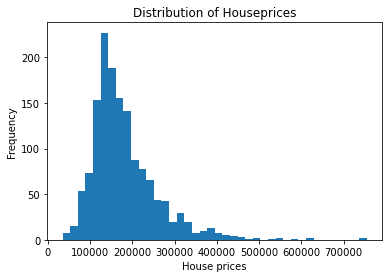

In [7]:
# your code here
df['SalePrice'].plot(kind='hist',bins=40)
plt.title('Distribution of Houseprices')
plt.xlabel('House prices')
plt.show()

In [8]:
# your comment here
"""Looks fairly normal distributed however it positively skewed as their are some datapoint with some high sales prices. """

'Looks fairly normal distributed however it positively skewed as their are some datapoint with some high sales prices. '

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

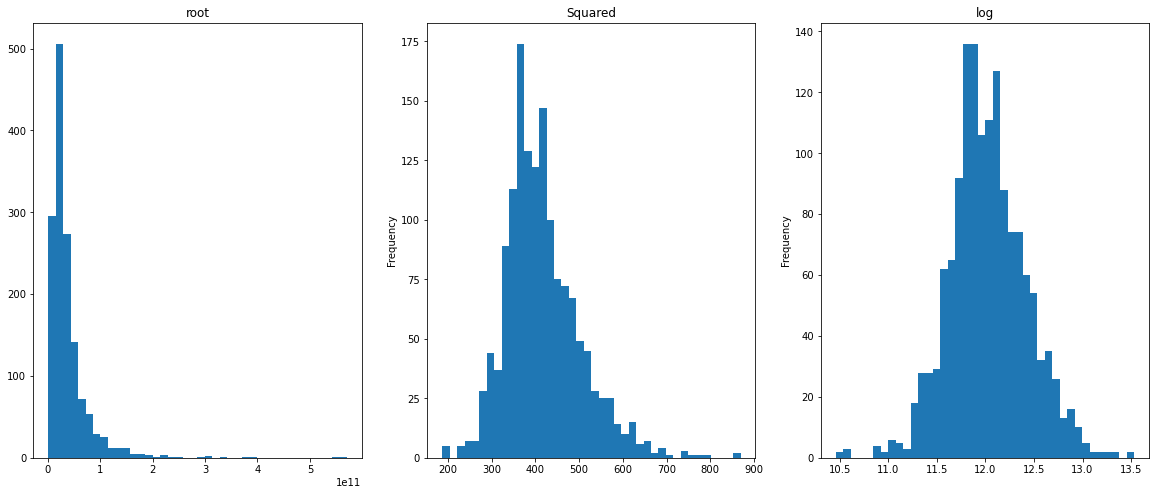

In [9]:
# your code here
# figure, ax = plt.subplots(nrows=1, ncols=3)
figure, ax = plt.subplots(nrows=1,ncols=3, figsize = (20,8))

plt.sca(ax[0])
plt.title('root')
plt.hist((df['SalePrice'] ** 2),bins=40) 
plt.sca(ax[1])
plt.title('Squared')
(df['SalePrice'] ** (1/2)).plot(kind='hist',bins=40)
plt.sca(ax[2])
plt.title('log')
(np.log(df['SalePrice'])).plot(kind='hist',bins=40)
plt.show()

In [10]:
# I will take the log sales prices for my new variable SalePriceAdjusted as it follows the best normal distribution.
df2['SalePriceAdjusted'] = (np.log(df2['SalePrice']))
#paolo: yes very nice! Also remember to label the axes on the plots

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [11]:
###I assume that the year is 2010. I use this year to calculate the ages of the house as 
#it is the max year in the dataset. 
df.YearBuilt.max()

2010

In [12]:
# your code here
df3 = df2.copy()
df3['size_house'] = df3[['GrLivArea','LotArea','GarageArea']].sum(axis=1)
# I take sum of all spaces so I know what the total size of the house is 

In [13]:
df3['rooms'] = df3[['BedroomAbvGr','KitchenAbvGr','FullBath','BsmtFullBath','BsmtHalfBath']].sum(axis=1)
#I sum all the room sto get a variable with the total number of the rooms in the house

In [14]:
#calculate the age of the house and the numbers of years that it was renovated.
df3['house_age'] = 2011 - df3['YearBuilt']

df3['house_remod_age'] = 2011 - df3['YearRemodAdd']

# i think the below is the correct way to caluclate the numbers of years that it was renovated.
### because otherwise the renovation year equals the year the house was built
df3['house_remod_age_2']  = np.where(df['YearBuilt'] == df3['YearRemodAdd'],0,((2011 - df3['YearRemodAdd'])*1))

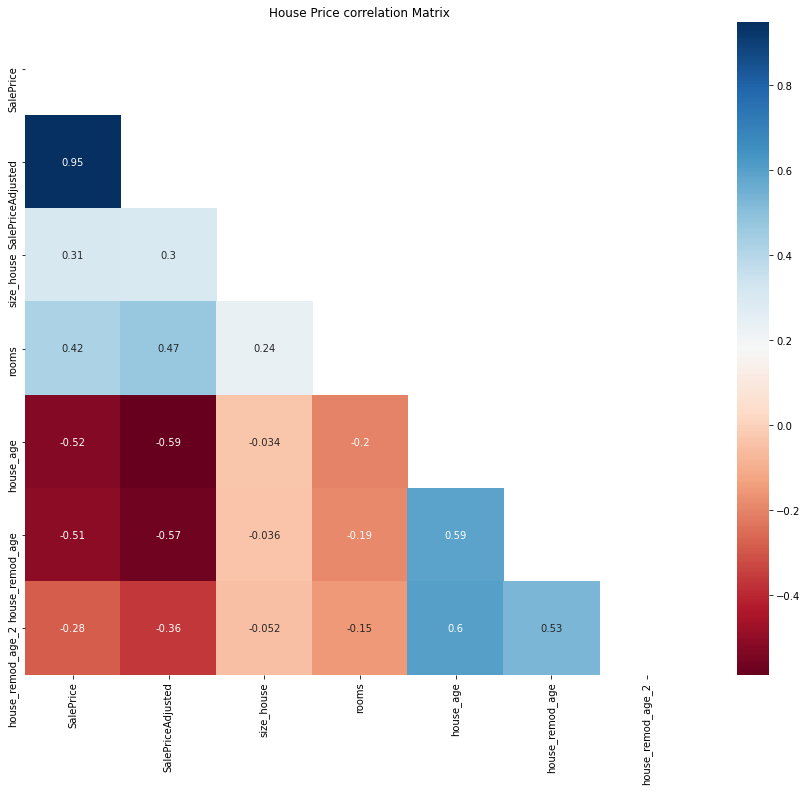

In [15]:
results = df3[['SalePrice','SalePriceAdjusted','size_house','rooms','house_age','house_remod_age','house_remod_age_2']].corr(method='pearson')
plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(results, dtype=np.bool))
plt.title("House Price correlation Matrix")
sns.heatmap(results, cmap="RdBu", mask=mask,annot=True)
plt.show()

##seems that the number of rooms and the age of the house have the highest correlation scores with sales price

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like this [example](https://drive.google.com/file/d/1JhdNvbAnnWDFXEtDoBtx3B2KKIkqsnSH/view?usp=sharing)

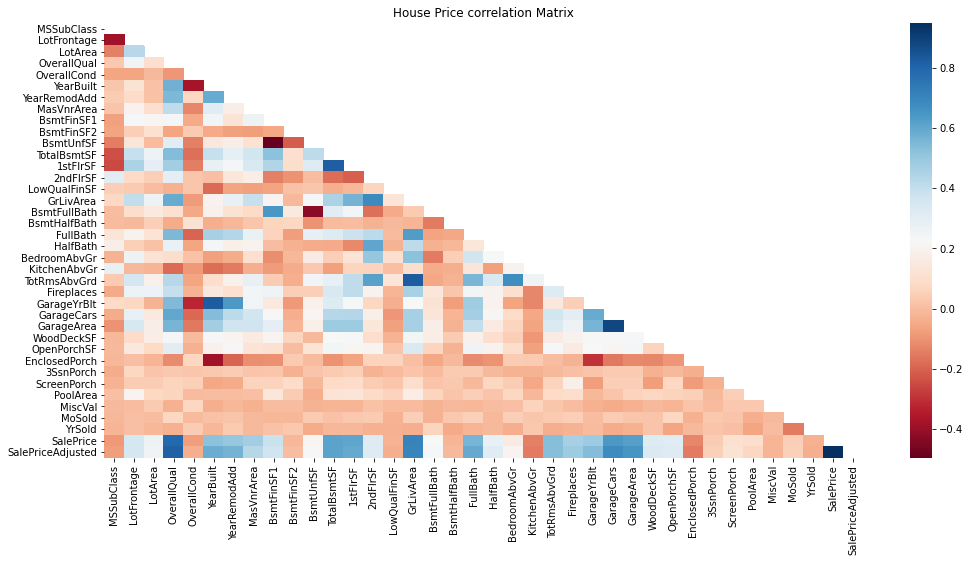

In [16]:
# your code here
plt.figure(figsize=(17,8))
mask = np.triu(np.ones_like(df2.corr(method='pearson'), dtype=np.bool))
plt.title("House Price correlation Matrix")
sns.heatmap(df2.corr(method='pearson'), cmap="RdBu", mask=mask)
plt.show()

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [17]:
# your comment here
# for this exercise I use the adjusted sales price. I print out all the correlation values for Saleprice adjusted
df3.corr(method='pearson')['SalePriceAdjusted'].to_frame().reset_index().sort_values('SalePriceAdjusted',ascending=False).iloc[:7]

,index,SalePriceAdjusted
37,SalePriceAdjusted,1.000000
36,SalePrice,0.948374
3,OverallQual,0.817184
15,GrLivArea,0.700927
25,GarageCars,0.680625
26,GarageArea,0.650888
11,TotalBsmtSF,0.612134


## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [18]:
# your responses here
# I make a dataframe with the highest correlation factors. 
final_df = df3[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePriceAdjusted']]
# add cells as needed

"""
OverallQual:
There is a positive correlation between the quality of the house and the sales price. 
Make sense. The quality rating is actually a categorical variable. 

GrLivArea:
There is a positive correlation between the total size of the ground living are of the house and the sales price. 
Make sense. as I would expect that bigger house are more expensive and also have bigger gound living areas

GarageCars:
There is a positive correlation between the sales price and the number of car garages. 
Make sense. as I would expect that only bigger house which are more expensive have multiple car garages. 

GarageArea:
There is a positive correlation between the sales price and the car garagespace. 
Make sense. as I would expect that only bigger houses have a bigger garage space.  


TotalBsmtSF:
There is a positive correlation between the sales price and the total size of the basement 
Make sense. as I would expect that bigger house which are more expensive have bigger basements.
"""


'\nOverallQual:\nThere is a positive correlation between the quality of the house and the sales price. \nMake sense. The quality rating is actually a categorical variable. \n\nGrLivArea:\nThere is a positive correlation between the total size of the ground living are of the house and the sales price. \nMake sense. as I would expect that bigger house are more expensive and also have bigger gound living areas\n\nGarageCars:\nThere is a positive correlation between the sales price and the number of car garages. \nMake sense. as I would expect that only bigger house which are more expensive have multiple car garages. \n\nGarageArea:\nThere is a positive correlation between the sales price and the car garagespace. \nMake sense. as I would expect that only bigger houses have a bigger garage space.  \n\n\nTotalBsmtSF:\nThere is a positive correlation between the sales price and the total size of the basement \nMake sense. as I would expect that bigger house which are more expensive have bigge

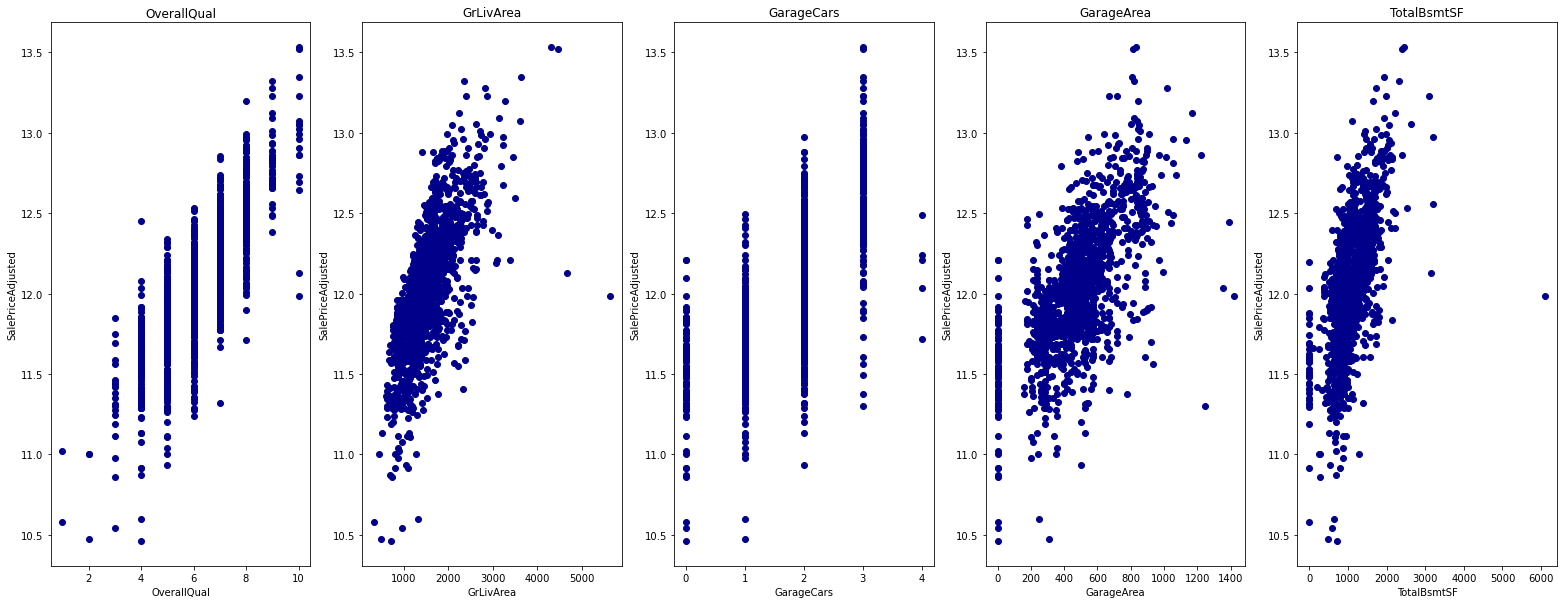

In [19]:
"""
In my opinion the best way to show relationship of two variables is a scatterplot. 
I chose not to go for a pairplot as it is diificult to read 
"""

cols = final_df.columns[0:-1]
fig, ax = plt.subplots(1,len(final_df.transpose())-1, figsize=(27,10))

for i in range(5):
    plt.sca(ax[i])
    plt.title(cols[i])
    
    plt.scatter(final_df[cols[i]], final_df['SalePriceAdjusted'], color = 'darkblue')
    plt.xlabel(df[cols[i]].name)
    plt.ylabel('SalePriceAdjusted')

In [20]:
#paolo: maybe plots in pairs of two as 4 plots on one line are difficult to read.
#Also very good to use both correlation values and plots. Correlation values give you an indication
# but it is always a good idea to plot the variables directly.

In [ ]:
#paolo: yes very good work